# Yoga Pose Classification 



In [29]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [16]:
from google.colab import drive


drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
%cd /content/gdrive/MyDrive/Projects_Colab/Yoga
train_dir = "/content/gdrive/MyDrive/Projects_Colab/Yoga"
!unzip dataset.zip


/content/gdrive/MyDrive/Projects_Colab
unzip:  cannot find or open dataset.zip, dataset.zip.zip or dataset.zip.ZIP.


In [34]:
all_classes =[]
for file in os.listdir(train_dir):
    all_classes.append(file)

In [35]:
len(all_classes)

107

In [36]:
len(all_classes)

107

In [37]:
Name = all_classes
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [26]:
dataset=[]
testset=[]
count=0
train_dir = "/content/gdrive/MyDrive/Projects_Colab/Yoga/"
for file in os.listdir(train_dir):
    t=0
    path=os.path.join(train_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(40,40))
        image=img_to_array(image)
        image=image/255.0
        if t<60:
            dataset+=[[image,count]]
        else:
            testset+=[[image,count]]
        t+=1
    count=count+1

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [27]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)
labels1=to_categorical(labels0)
labels=np.array(labels1)
data=np.array(data)
test=np.array(test)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=44)

In [41]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4495, 40, 40, 3)
(4495, 107)
(1124, 40, 40, 3)
(1124, 107)


In [50]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(107, activation='softmax')(x)

model = Model(i, x)

In [52]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:


r=model.fit(datagen.flow(x_train,y_train,batch_size=32),validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
141/141 [==============================] - 8s 44ms/step - loss: 5.1465 - accuracy: 0.0133 - val_loss: 4.8019 - val_accuracy: 0.0044
Epoch 2/30
141/141 [==============================] - 6s 39ms/step - loss: 4.6809 - accuracy: 0.0158 - val_loss: 4.6880 - val_accuracy: 0.0151
Epoch 3/30
141/141 [==============================] - 5s 39ms/step - loss: 4.6298 - accuracy: 0.0214 - val_loss: 4.5980 - val_accuracy: 0.0205
Epoch 4/30
141/141 [==============================] - 5s 38ms/step - loss: 4.5659 - accuracy: 0.0227 - val_loss: 4.4231 - val_accuracy: 0.0374
Epoch 5/30
141/141 [==============================] - 5s 39ms/step - loss: 4.4926 - accuracy: 0.0296 - val_loss: 4.4374 - val_accuracy: 0.0409
Epoch 6/30
141/141 [==============================] - 5s 38ms/step - loss: 4.4048 - accuracy: 0.0396 - val_loss: 4.3744 - val_accuracy: 0.0356
Epoch 7/30
141/141 [==============================] - 5s 38ms/step - loss: 4.2951 - accuracy: 0.0449 - val_loss: 4.2369 - val_accuracy: 0.0436

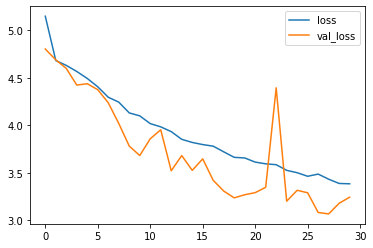

In [54]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

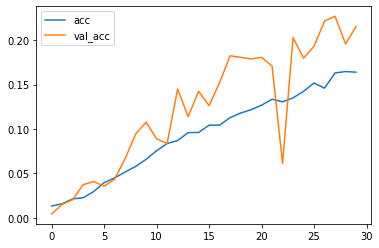

In [55]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [56]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(40,40,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(107, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

74842112/74836368 [==============================] - 1s 0us/step


In [57]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
141/141 [==============================] - 31s 126ms/step - loss: 4.6301 - accuracy: 0.0229 - val_loss: 4.4346 - val_accuracy: 0.0560
Epoch 2/30
141/141 [==============================] - 11s 78ms/step - loss: 4.3357 - accuracy: 0.0616 - val_loss: 4.0794 - val_accuracy: 0.0881
Epoch 3/30
141/141 [==============================] - 12s 82ms/step - loss: 4.0440 - accuracy: 0.1041 - val_loss: 3.7483 - val_accuracy: 0.1201
Epoch 4/30
141/141 [==============================] - 11s 79ms/step - loss: 3.8563 - accuracy: 0.1246 - val_loss: 3.6519 - val_accuracy: 0.1210
Epoch 5/30
141/141 [==============================] - 12s 82ms/step - loss: 3.7122 - accuracy: 0.1408 - val_loss: 3.4946 - val_accuracy: 0.1699
Epoch 6/30
141/141 [==============================] - 11s 78ms/step - loss: 3.6107 - accuracy: 0.1577 - val_loss: 3.4439 - val_accuracy: 0.1708
Epoch 7/30
141/141 [==============================] - 11s 78ms/step - loss: 3.5243 - accuracy: 0.1751 - val_loss: 3.4241 - val_accuracy

In [ ]:
y_pred=model.predict(x_test)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
# image=load_img("../input/yoga-pose-image-classification-dataset/dataset/adho mukha svanasana/95. downward-facing-dog-pose.png",target_size=(40,40))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [ ]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))